In [128]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/96653/Desktop/Tuwaiq_Labs/Usecase-7/final_data.csv")

In [3]:
df.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


In [7]:
df.tail(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.0,18.0,21,0.0,0.0,0.086042,...,0.0,0.0,1046,0,0,0,25000,25000,4,0


In [9]:
df.shape

(10754, 22)

In [11]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [15]:
df.describe(include="object")

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [17]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [19]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [21]:
df.isnull().sum().sort_values(ascending = False)

player                 0
team                   0
position_encoded       0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
goals conceded         0
red cards              0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
name                   0
winger                 0
dtype: int64

In [23]:
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [25]:
df.drop(["player"],axis=1,inplace=True)

In [27]:
df.drop(["award"],axis=1,inplace=True)

In [29]:
df.drop(["highest_value"],axis=1,inplace=True)

In [31]:
df.drop(["name"],axis=1,inplace=True)

In [33]:
df.drop(["position"],axis=1,inplace=True)

In [35]:
df.shape

(10754, 17)

(6974, 17)

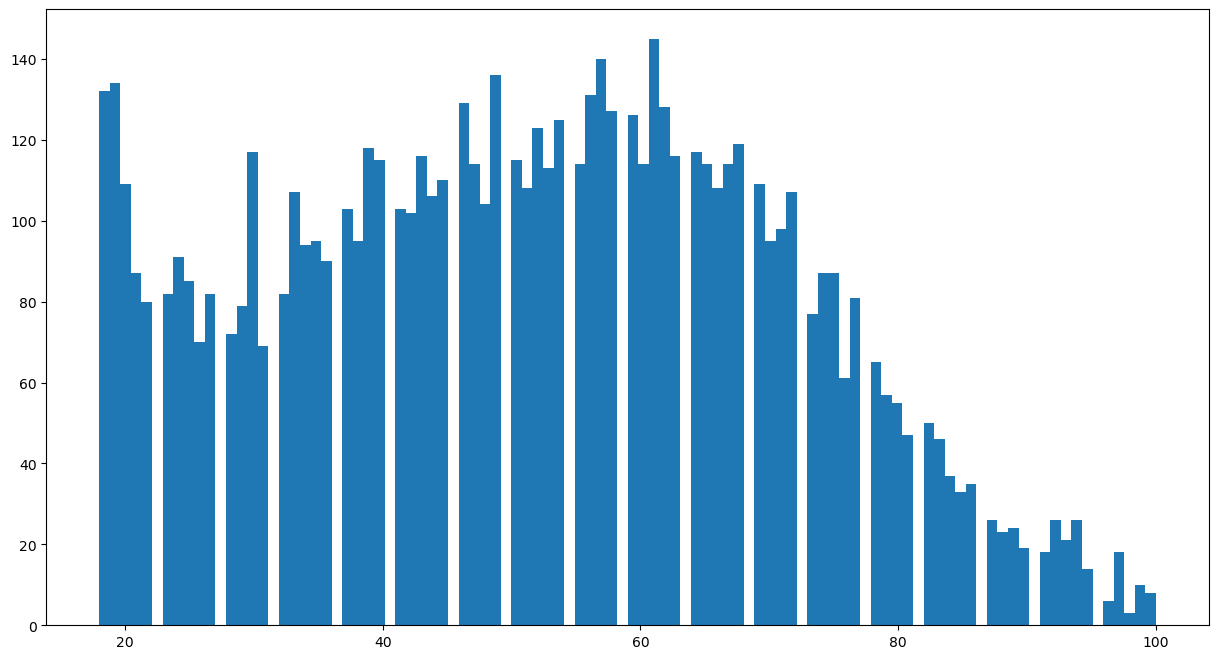

In [37]:
plt.figure(figsize=(15,8))

plt.hist(df[(df['appearance'] >= 18)  & (df['appearance'] <= 100 )]['appearance'],bins=100);
df[(df['appearance'] >= 18 )  & (df['appearance'] <= 100 )].shape

In [39]:
df= df[(df['appearance'] >= 18)  & (df['appearance'] <= 100 )]

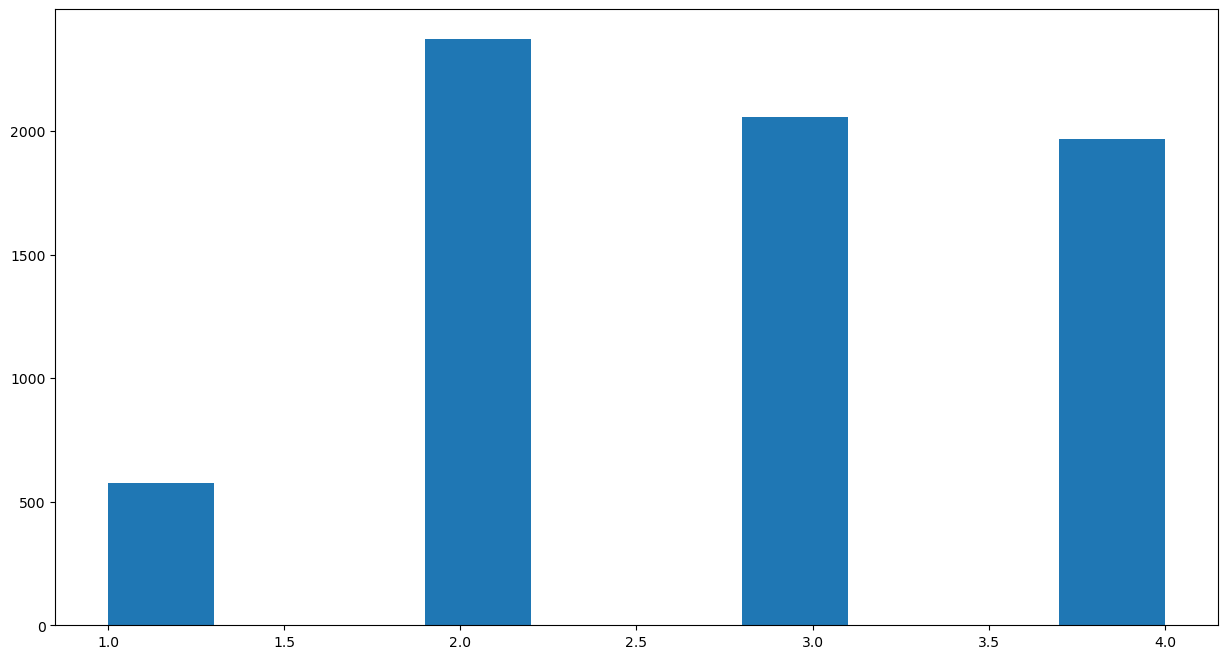

In [43]:
plt.figure(figsize=(15,8))
plt.hist(df['position_encoded']);

(4086, 17)

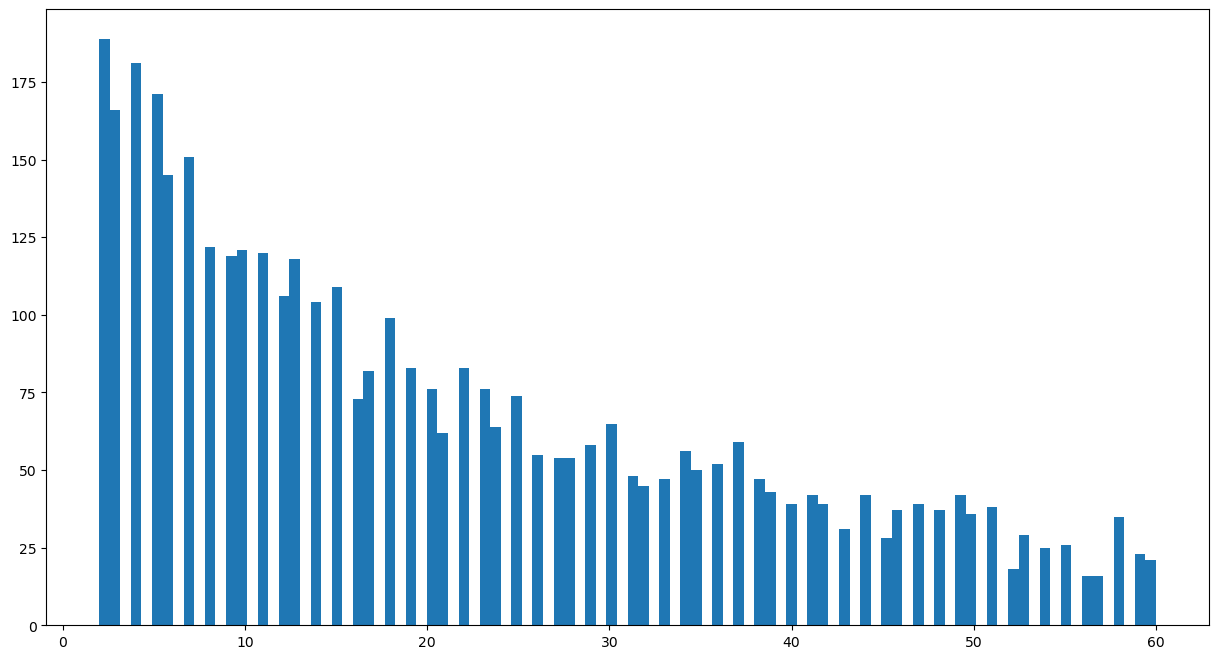

In [71]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['games_injured'] >= 2)  & (df['games_injured'] <= 60 )]['games_injured'],bins=100)
df[(df['games_injured'] >= 2 )  & (df['games_injured'] <= 60 )].shape

In [73]:
df=df[(df['games_injured'] >= 2)  & (df['games_injured'] <= 60 )]

(4086, 17)

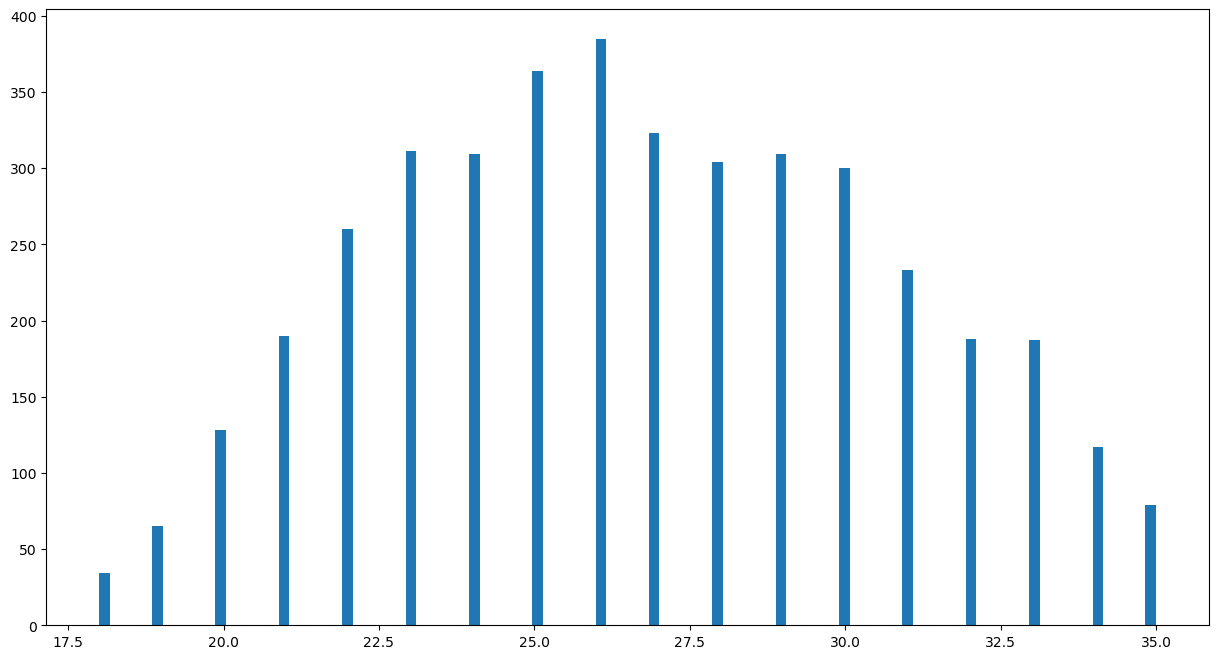

In [75]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['age'] >= 18)  & (df['age'] <= 35 )]['age'],bins=100);
df[(df['age'] >= 18)  & (df['age'] <= 35 )].shape

In [77]:
df = df[(df['age'] >= 18)  & (df['age'] <= 35 )]

In [79]:
df.shape

(4086, 17)

In [84]:
categorical_features = ['team']

In [86]:
df = pd.get_dummies(df, columns=categorical_features)

In [88]:
df.shape

(4086, 374)

In [90]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [92]:
p25 = df['current_value'].quantile(0.25)
p75 = df['current_value'].quantile(0.75)

def categorize_c(current_value):
    if current_value < p25:
        return 'Low amount'
    elif current_value < p75:
        return 'Moderate amount'
    else:
        return 'High amount'

df['player amount'] = df['current_value'].apply(categorize_c)

df.drop('current_value', axis=1, inplace=True)

print(df['player amount'].value_counts())

player amount
Moderate amount    2023
High amount        1111
Low amount          952
Name: count, dtype: int64


In [94]:
p25, p75

(700000.0, 6000000.0)

In [96]:
encoder = LabelEncoder()
df['player amount encoded'] = encoder.fit_transform(df['player amount'])  

In [98]:
correlation = df.corr(numeric_only=True)
print(correlation['player amount encoded'].sort_values(ascending=False))

player amount encoded    1.000000
age                      0.138673
yellow cards             0.071976
team_FC Schalke 04       0.057145
team_Cádiz CF            0.054799
                           ...   
team_Chelsea FC         -0.098723
goals                   -0.100265
assists                 -0.116145
minutes played          -0.268912
appearance              -0.301131
Name: player amount encoded, Length: 374, dtype: float64


In [112]:
threshold = 0.2

selected_features = correlation[abs(correlation['player amount encoded']) > \
threshold]['player amount encoded'].index
selected_features

Index(['appearance', 'minutes played', 'player amount encoded'], dtype='object')

In [114]:
elected_features = ['appearance', 'minutes played', 'player amount encoded']

In [116]:
df = df[selected_features]
df.head()

,appearance,minutes played,player amount encoded
3,82,6408,0
4,63,5031,0
5,68,4762,0
6,70,5471,0
8,34,2758,2


In [118]:
X = df.drop(['player amount encoded'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [120]:
X.shape

(4086, 2)

In [130]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

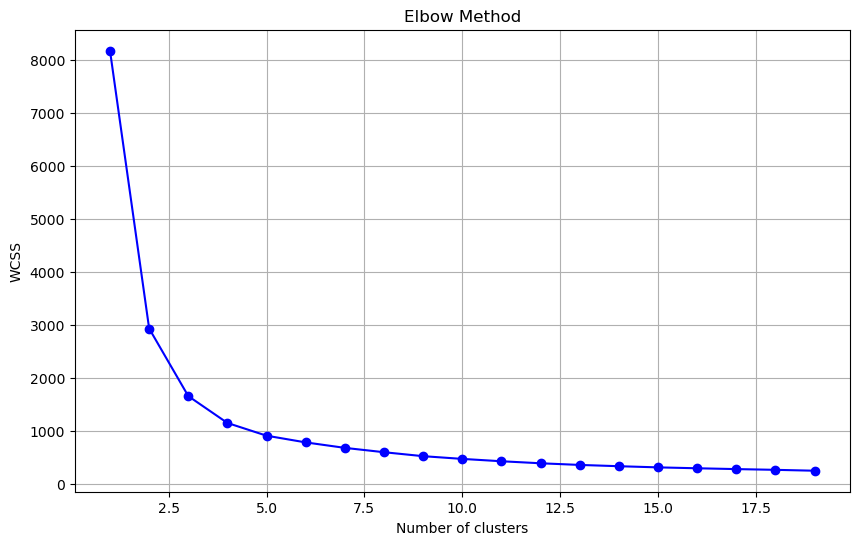

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [134]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 8 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [136]:
y_pred = model.fit_predict(X_scaled)


In [138]:
X.head(2)


,appearance,minutes played
3,82,6408
4,63,5031


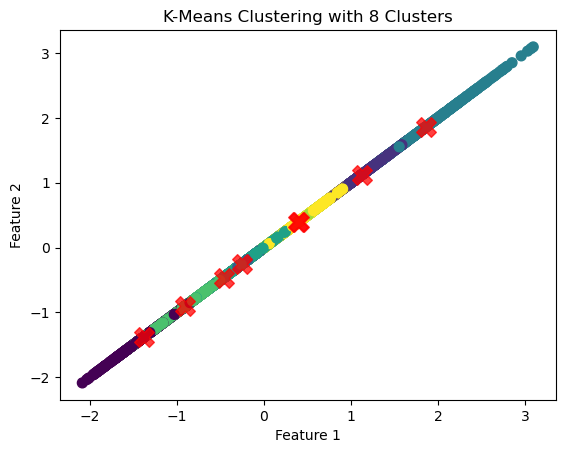

In [146]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [148]:
X['kmeans'] = y_pred


In [150]:
X['kmeans'].value_counts()


kmeans
7    650
5    642
4    566
0    547
1    519
2    432
6    367
3    363
Name: count, dtype: int64

In [152]:
X[X['kmeans']==0]


,appearance,minutes played,kmeans
28,34,1030,0
29,24,1700,0
61,25,1465,0
82,18,1539,0
123,32,1614,0
...,...,...,...
10706,29,1288,0
10707,25,1060,0
10735,20,1201,0
10738,23,1555,0


<Axes: xlabel='appearance', ylabel='minutes played'>

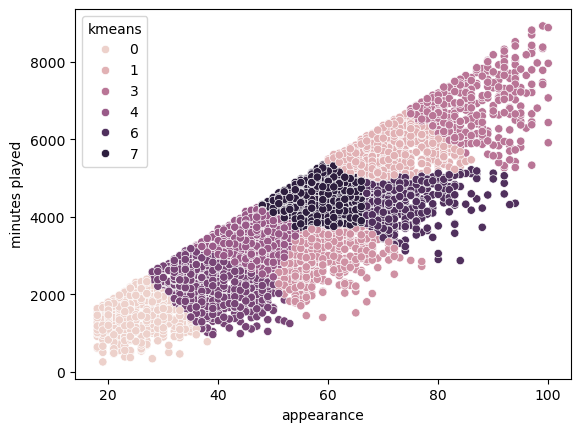

In [154]:
sns.scatterplot(data = X , x = 'appearance', y = 'minutes played', hue = 'kmeans')
